In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
plt.style.use("seaborn-v0_8-poster")

### Simulating data 
(2nd order polynomial with Gaussian noise)

<Axes: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}>

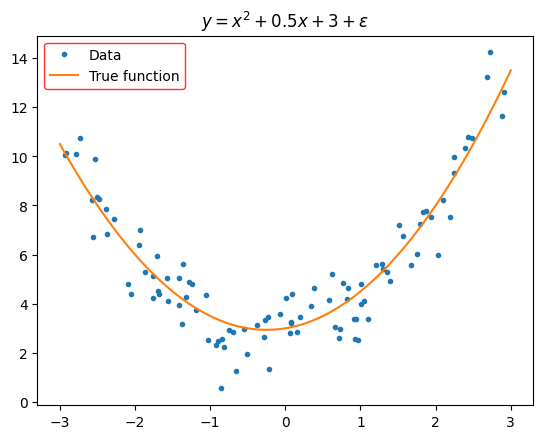

In [8]:
samples = 100
X = np.random.uniform (-3, 3, (samples, 1)) # генерирует array с одним столбцом случайных чисел из равномерного распределения в интервале от -3 до 3. 
f = lambda x: x**2 + .5*x + 3
y = f(X) + np.random.randn (samples, 1) # returns a sample (or samples) from the "standard normal" distribution.

def draw_data():
    fig = plt.figure (dpi = 100) 
    ax = plt.axes()
    ax.plot(X, y, '.', label = "Data")

    x = np.linspace(-3, 3, samples) # cоздает массив x с равномерно распределенными значениями от -3 до 3
    ax.plot (x, f(x), label = "True function")

    ax.set(title = r"$y = x^2 + 0.5x + 3 + \epsilon$")
    ax.legend (edgecolor = "r") # добавляет легенду с красным цветом границ

    return ax

draw_data()

* r"$y = x^2 + 0.5x + 3 + \epsilon$": Префикс r перед строкой указывает на то, что это "сырая" строка (raw string), что означает, что символы \ внутри строки не будут интерпретированы как управляющие последовательности, а будут использоваться буквально.

* $y = x^2 + 0.5x + 3 + \epsilon$: выражение, использующее синтаксис LaTeX для вставки математических символов и формул. 

## Polynomial regression

sklearn.preprocessing.PolynomialFeatures creates a feature matrix that represent polynomial combinations.

For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False) #bias - b0 (intercept)

poly

PolynomialFeatures(include_bias=False)

In [13]:
poly_features = poly.fit_transform(X)

Эта строка преобразует исходные признаки X в полиномиальные признаки. Метод fit_transform выполняет два шага:

- Сначала, он "обучает" PolynomialFeatures на основе данных X. В данном случае, объект poly "запоминает", как генерировать полиномиальные признаки второй степени.
- Затем, он преобразует данные, создавая новый массив poly_features, содержащий исходные признаки и новые полиномиальные признаки второй степени.
- Т. обр., для каждого исходного признака создается его квадратичный член, и эти новые признаки объединяются в новый массив. В результате мы получаем расширенный набор признаков, который включает в себя исходные признаки и их квадратичные комбинации. 

In [14]:
poly_features [:4]

array([[ 1.04125659,  1.08421528],
       [-0.50835571,  0.25842553],
       [ 0.96363688,  0.92859604],
       [-0.27069179,  0.07327405]])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit (poly_features, y)
model.coef_

array([[0.51029617, 1.06405093]])

In [17]:
model.intercept_

array([2.75223559])

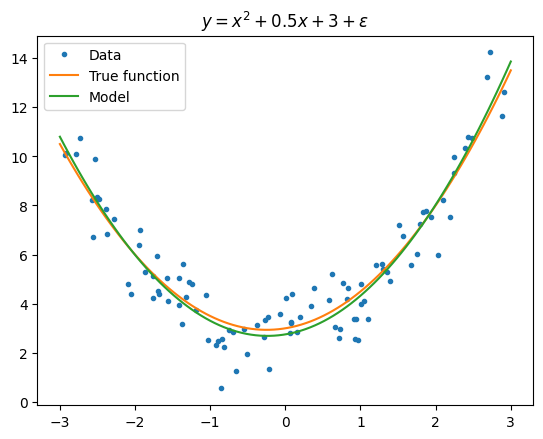

In [18]:
x = np.linspace (-3, 3, samples)
x_poly_features = poly.transform(x.reshape(-1, 1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred, label = "Model")
ax.legend()

## Underfitting

[Text(0.5, 1.0, 'Underfitting, model too simple')]

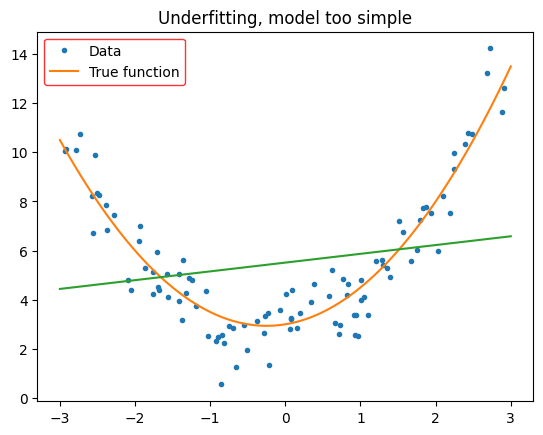

In [19]:
model = LinearRegression()
model.fit (X, y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1, 1)))
ax.set(title = "Underfitting, model too simple")

## Overfitting

(100, 30)


[Text(0.5, 1.0, 'Overfitting, model too complex'), (1.0, 15.0)]

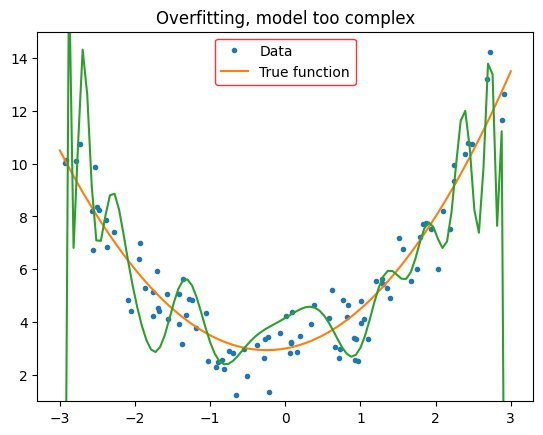

In [25]:
poly_model_30 = PolynomialFeatures (30, include_bias = False)
X_features = poly_model_30.fit_transform(X)
print (X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace (-3, 3, samples)

x_poly_features = poly_model_30.transform(x.reshape (-1, 1))
pred = model.predict (x_poly_features)

ax = draw_data()
ax.plot (x, pred)
ax.set (title = "Overfitting, model too complex", ylim = [1, 15])

## Choose a model

Using a cost/loss function to keep track of the error for different models (different degrees of polynomial)

In [26]:
from sklearn.model_selection import train_test_split


In [30]:
# we increasenumber of simulated samples
samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x**4 + x**2 + .5*x + 3
y = f(X) + np.random.randn(samples, 1)

### Train / Validation / Test split

We split our data set into:
- training set
- validation set
- testing set

Reason for this split is to use the validation data for choosing the degree of the polynomial (a hyperparameter)

In [31]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

### Fit model and predict

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
RMSE_val = []

for degree in range (1, 100):
    model_poly = PolynomialFeatures(degree, include_bias = False)
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_lin_reg = LinearRegression()

    model_lin_reg.fit(train_features, y_train)
    y_pred_val = model_lin_reg.predict(val_features)
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')]

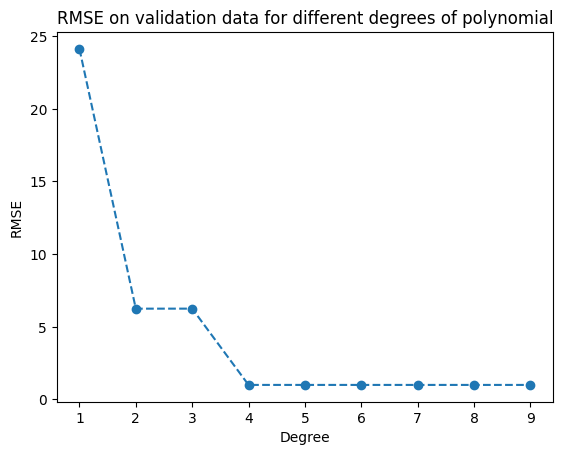

In [34]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range (1, 10), RMSE_val [:9], '--o', label = "Validation")
ax.set (xlabel = "Degree", ylabel = "RMSE", title = "RMSE on validation data for different degrees of polynomial")

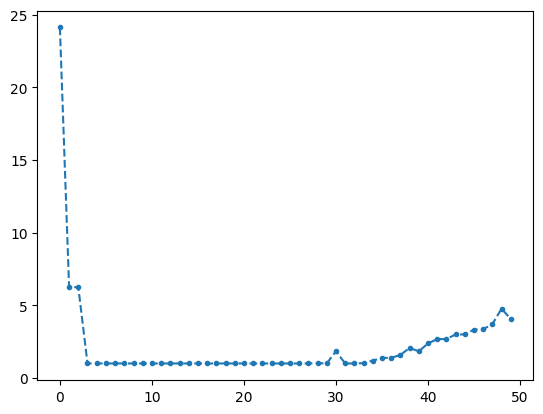

In [35]:
ax = plt.axes()

ax.plot(range(50), RMSE_val[:50], '--.', label = "Validation")